Script di bawah ini mengimpor berbagai library yang diperlukan untuk proses pengolahan citra dan analisis data. Library yang digunakan antara lain: `os` untuk manajemen file dan direktori, `cv2` (OpenCV) untuk pengolahan citra, `numpy` untuk operasi numerik dan array, `pandas` untuk manipulasi dan analisis data, `math` untuk operasi matematika dasar, `tqdm` untuk menampilkan progress bar, `seaborn` untuk visualisasi data, `sklearn.svm` untuk Support Vector Machine (SVM) classifier, `matplotlib.pyplot` untuk membuat plot dan visualisasi data, `sklearn.impute` untuk menangani data yang hilang, `sklearn.preprocessing` untuk preprocessing data seperti scaling, `sklearn.neighbors` untuk K-Nearest Neighbors (KNN) classifier, `sklearn.ensemble` untuk Random Forest classifier, `matplotlib.colors` untuk mengatur skema warna pada plot, `sklearn.model_selection` untuk membagi dataset menjadi data latih dan data uji, serta `sklearn.metrics` untuk menghitung metrik evaluasi model seperti akurasi, presisi, recall, F1 score, dan confusion matrix.

In [1]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Script di bawah ini merupakan fungsi `resize_image` yang digunakan untuk mengubah ukuran gambar sesuai dengan ukuran target yang ditentukan. Fungsi ini menerima dua parameter: `image`, yaitu citra input yang akan diubah ukurannya, dan `target_size`, yaitu ukuran target dalam format (lebar, tinggi). Prosesnya melibatkan mendapatkan ukuran asli gambar, membuat array kosong untuk menyimpan gambar yang diubah ukurannya, menghitung koordinat piksel asli untuk setiap piksel di gambar yang diubah ukurannya, serta mengisi piksel gambar yang diubah ukurannya dengan nilai dari piksel gambar asli yang sesuai. Fungsi ini mengembalikan gambar yang telah diubah ukurannya.

In [2]:
def resize_image(image, target_size):

    original_height, original_width, _ = image.shape
    target_width, target_height = target_size
    resized_image = np.zeros((target_height, target_width, 3), dtype=np.uint8)
    
    for i in range(target_height):
        for j in range(target_width):
            original_x = int(j * original_width / target_width)
            original_y = int(i * original_height / target_height)
            resized_image[i, j] = image[original_y, original_x]
    
    return resized_image

def insertGambar(folder):
    data = []
    filenames = []
    datalabel = [] 
    path = []
    data_distribution = {}
    for label in (os.listdir(folder)):
        images = os.listdir(folder+label)
        data_distribution[label] = len(images)
        datalabel.append(label)
        print(label)
        count = 0
        for filename in tqdm(os.listdir(folder+label)):
            # if count == 100:
            #     break
            # else :
            count += 1
            img = cv.imread(os.path.join(folder+label,filename))
            if img is not None:
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                img = resize_image(img, (150, 150))
                filenames.append(filename)
                path.append(label)
                data.append(img)
    return data, filenames, datalabel, path , data_distribution

Script di bawah ini merupakan fungsi `insertGambar` yang digunakan untuk membaca gambar dari folder yang diberikan, mengubah ukurannya, dan menyimpannya bersama dengan informasi terkait. Parameter yang diterima adalah `folder`, yaitu direktori yang berisi folder dengan gambar yang akan diproses. Prosesnya melibatkan inisialisasi beberapa list untuk menyimpan data gambar, nama file, label data, dan path, menghitung distribusi data (jumlah gambar per label), membaca gambar dari setiap folder, mengubah warna dari BGR ke RGB, mengubah ukurannya menjadi 150x150 piksel, dan menyimpannya ke dalam list. Fungsi ini mengembalikan data gambar yang telah diubah ukurannya, nama file, label data, path, dan distribusi data.
Bagian ini mengeksekusi fungsi `insertGambar` dengan argumen "train/" dan menyimpan hasilnya ke dalam beberapa variabel. Hasil yang diperoleh kemudian dicetak, termasuk jumlah data gambar yang diproses, jumlah label yang ditemukan, jumlah nama file yang diproses, dan distribusi data (jumlah gambar per label).

In [3]:
images, filenames,labels, path, distribusi = insertGambar("train/") 
print("Data: ", len(images))
print("Label: ", len(labels))
print("Filenames: ", len(filenames))
print("Data Distribution: ", distribusi)

BALI STARLING


100%|██████████| 132/132 [00:09<00:00, 13.29it/s]


SAMATRAN THRUSH


100%|██████████| 153/153 [00:11<00:00, 12.93it/s]


VISAYAN HORNBILL


100%|██████████| 163/163 [00:14<00:00, 11.16it/s]

Data:  448
Label:  3
Filenames:  448
Data Distribution:  {'BALI STARLING': 132, 'SAMATRAN THRUSH': 153, 'VISAYAN HORNBILL': 163}


Script di bawah ini merupakan fungsi `display_sample` yang digunakan untuk menampilkan beberapa contoh gambar dari sekumpulan gambar yang diberikan. Fungsi ini menerima satu parameter yaitu `images`, yang merupakan list atau array berisi citra yang akan ditampilkan. Prosesnya melibatkan pembuatan figure dengan ukuran 20x10 inci, kemudian menampilkan 7 gambar pertama dari list `images` secara berurutan dalam satu baris. Pada setiap subplot, tanda centang pada sumbu x dan y dihilangkan, grid dinonaktifkan, dan gambar ditampilkan dalam skala abu-abu (`cmap='gray'`). Setelah semua gambar ditambahkan ke figure, fungsi `plt.show()` dipanggil untuk menampilkan gambar-gambar tersebut pada satu tampilan.

In [4]:
def display_sample(images):
  plt.figure(figsize=(20,10))
  for i in range(7):
    plt.subplot(1,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap='gray')
  plt.show() 

Script di bawah ini merupakan fungsi `gray_scaling`, yang digunakan untuk mengonversi gambar berwarna menjadi gambar dalam skala abu-abu. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan list atau array berisi citra berwarna yang akan dikonversi. Prosesnya melibatkan inisialisasi list kosong `grayData`, lalu untuk setiap gambar dalam `data`, gambar tersebut dikonversi ke skala abu-abu menggunakan `cv.cvtColor(img, cv.COLOR_BGR2GRAY)`, dan hasilnya ditambahkan ke `grayData`. Fungsi ini mengembalikan list `grayData` yang berisi gambar-gambar dalam skala abu-abu.
Bagian ini mengeksekusi fungsi `gray_scaling` dengan parameter `images` (kumpulan gambar berwarna) dan menyimpan hasilnya ke dalam variabel `gray_img`. Kemudian, fungsi `display_sample(gray_img)` dipanggil untuk menampilkan beberapa contoh gambar dalam skala abu-abu.

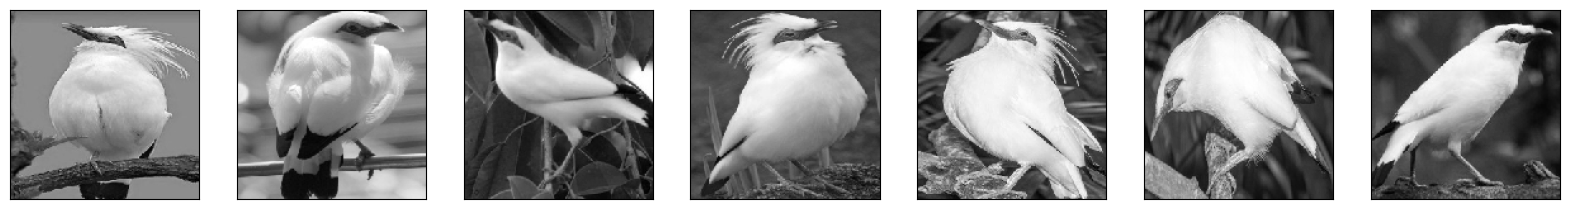

In [5]:
def gray_scaling(data):
    grayData = []
    for img in data:
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        grayData.append(gray)
    return grayData

gray_img = gray_scaling(images)

display_sample(gray_img)

Script di bawah ini merupakan fungsi `normalisasi`, yang digunakan untuk menormalkan intensitas piksel pada gambar dalam skala abu-abu. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan list atau array berisi citra dalam skala abu-abu yang akan dinormalisasi. Prosesnya melibatkan inisialisasi list kosong `normData`, lalu untuk setiap gambar dalam `data`, gambar tersebut dinormalisasi menggunakan `cv.normalize(img, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)`, dan hasilnya ditambahkan ke `normData`. Fungsi ini mengembalikan list `normData` yang berisi gambar-gambar yang telah dinormalisasi.
Bagian ini mengeksekusi fungsi `normalisasi` dengan parameter `gray_img` (kumpulan gambar dalam skala abu-abu) dan menyimpan hasilnya ke dalam variabel `normData`. Kemudian, fungsi `display_sample(normData)` dipanggil untuk menampilkan beberapa contoh gambar yang telah dinormalisasi.

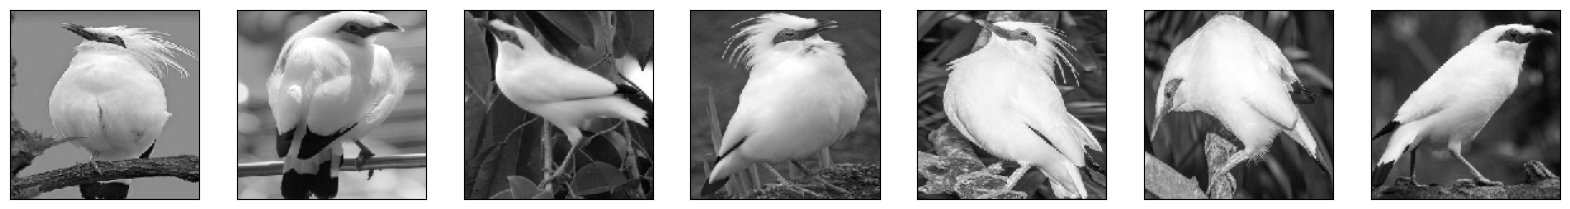

In [6]:
def normalisasi(data):
    normData = []
    for img in data:
        norm = cv.normalize(img, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
        normData.append(norm)
    return normData

normData = normalisasi(gray_img)

display_sample(normData)

Script di bawah ini merupakan fungsi `matriksTransformasi`, yang digunakan untuk melakukan transpose pada sebuah matriks. Fungsi ini menerima satu parameter yaitu `matriks`, yang merupakan matriks yang akan ditranspose. Prosesnya melibatkan inisialisasi matriks `hasil` dengan ukuran yang sama dengan `matriks`, lalu untuk setiap elemen dalam matriks, elemen pada posisi `[i][j]` dipindahkan ke posisi `[j][i]`. Fungsi ini mengembalikan matriks `hasil` yang merupakan hasil transpose dari `matriks`.
DAn fungsi `sum`, yang digunakan untuk menghitung jumlah seluruh elemen dalam sebuah matriks. Fungsi ini menerima satu parameter yaitu `matriks`, yang merupakan matriks yang elemen-elemennya akan dijumlahkan. Prosesnya melibatkan inisialisasi variabel `hasil` dengan nilai 0, lalu untuk setiap elemen dalam matriks, elemen tersebut ditambahkan ke `hasil`. Fungsi ini mengembalikan nilai `hasil` yang merupakan jumlah seluruh elemen dalam matriks.

In [7]:
def matriksTransformasi(matriks):
    hasil = np.zeros(matriks.shape)
    for i in range(matriks.shape[0]):
        for j in range(matriks.shape[1]):
            hasil[i][j] = matriks[j][i]
    return hasil
def sum(matriks):
    hasil = 0
    for i in range(len(matriks)):
        for j in range(len(matriks[0])):
            hasil += matriks[i][j]
    return hasil


Script di bawah ini merupakan fungsi `derajat`, yang digunakan untuk menghitung Gray-Level Co-occurrence Matrix (GLCM) untuk suatu citra pada sudut tertentu. Fungsi ini menerima dua parameter: `img`, yang merupakan citra input dalam skala abu-abu, dan `derajat`, yang merupakan sudut derajat (0, 45, 90, atau 135) untuk perhitungan GLCM. Prosesnya melibatkan inisialisasi matriks `temp` dengan ukuran `(max+1, max+1)` di mana `max` adalah nilai piksel maksimum dalam citra. Kemudian, untuk setiap sudut derajat, matriks `temp` diisi dengan frekuensi pasangan nilai piksel yang sesuai. Matriks `temp` kemudian dijumlahkan dengan transpose-nya, dan hasilnya dinormalisasi dengan membagi setiap elemen dengan jumlah total elemen dalam matriks. Fungsi ini mengembalikan matriks GLCM yang telah dinormalisasi.

In [8]:
def derajat(img, derajat):
    max = np.max(img)
    temp=np.zeros([max+1,max+1])
    if derajat == 0:
        for i in range (len(img)):
            for j in range (len(img[0])-1):
                temp[img[i,j],img[i,j+1]] += 1
    elif derajat == 45:
        for i in range (len (img)-1):
            for j in range (len (img[0])-1):
                temp[img[i+1,j],img[i,j+1]] += 1
    elif derajat == 90:
        for i in range (len (img)-1):
            for j in range (len (img[0])):
                temp[img[i+1,j],img[i,j]] += 1
    elif derajat == 135:
        for i in range (len (img)-1):
            for j in range (len (img[0])-1):
                temp[img[i,j],img[i+1,j+1]] += 1
    hasil = temp+matriksTransformasi(temp)
    total = sum(hasil)
    for i in range (len (hasil)):
        for j in range (len (hasil)):
            hasil[i,j]/=total
    return hasil

Script di bawah ini merupakan fungsi `GLCM`, yang digunakan untuk menghitung GLCM untuk sekumpulan citra pada empat sudut derajat (0, 45, 90, 135). Fungsi ini menerima satu parameter yaitu `image`, yang merupakan list atau array berisi citra-citra yang akan dihitung GLCM-nya. Prosesnya melibatkan inisialisasi list kosong `hasil`, lalu untuk setiap citra dalam `image`, GLCM dihitung pada empat sudut derajat yang berbeda menggunakan fungsi `derajat`, dan hasilnya ditambahkan ke `hasil`. Fungsi ini mengembalikan list `hasil` yang berisi GLCM untuk setiap citra pada empat sudut derajat yang berbeda.

In [9]:
def GLCM(image):
    hasil = []
    for img in tqdm(image):
        if np.min(img) < 0:
            continue
        data = []
        data.append(derajat(img,0))
        data.append(derajat(img,45))
        data.append(derajat(img,90))
        data.append(derajat(img,135))
        hasil.append(data)    
    return hasil

Bagian ini mengeksekusi fungsi `GLCM` dengan parameter `normData` (kumpulan gambar yang telah dinormalisasi) dan menyimpan hasilnya ke dalam variabel `hasil`. Proses ini menampilkan progress bar menggunakan `tqdm` untuk menunjukkan kemajuan perhitungan GLCM untuk setiap citra dalam `normData`.

In [10]:
hasil = GLCM(normData)

100%|██████████| 448/448 [08:32<00:00,  1.15s/it]


Script di bawah ini merupakan fungsi `contrast`, yang digunakan untuk menghitung nilai kontras dari sebuah matriks GLCM. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan matriks GLCM. Prosesnya melibatkan inisialisasi variabel `hasil` dengan nilai 0, lalu untuk setiap elemen dalam matriks, elemen tersebut dikalikan dengan kuadrat dari selisih indeks baris dan kolom, dan hasilnya ditambahkan ke `hasil`. Fungsi ini mengembalikan nilai `hasil` yang merupakan nilai kontras.

In [11]:
def contrast (data):
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil+=data[i,j]*pow(i-j,2)
    return hasil

Script di bawah ini merupakan fungsi `dissimilarity`, yang digunakan untuk menghitung nilai ketidakserupaan dari sebuah matriks GLCM. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan matriks GLCM. Prosesnya melibatkan inisialisasi variabel `hasil` dengan nilai 0, lalu untuk setiap elemen dalam matriks, elemen tersebut dikalikan dengan nilai absolut dari selisih indeks baris dan kolom, dan hasilnya ditambahkan ke `hasil`. Fungsi ini mengembalikan nilai `hasil` yang merupakan nilai ketidakserupaan.

In [12]:
def dissimilarity(data):  
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil+=data[i,j]*abs(i-j)
    return hasil


Script di bawah ini merupakan fungsi `homogeneity`, yang digunakan untuk menghitung nilai homogenitas dari sebuah matriks GLCM. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan matriks GLCM. Prosesnya melibatkan inisialisasi variabel `hasil` dengan nilai 0, lalu untuk setiap elemen dalam matriks, elemen tersebut dibagi dengan satu ditambah kuadrat dari selisih indeks baris dan kolom, dan hasilnya ditambahkan ke `hasil`. Fungsi ini mengembalikan nilai `hasil` yang merupakan nilai homogenitas.

In [13]:
def homogeneity(data):
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil+=(data[i,j]/(1+pow(i-j,2)))
    return hasil

Script di bawah ini merupakan fungsi `energy`, yang digunakan untuk menghitung nilai energi dari sebuah matriks GLCM. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan matriks GLCM. Prosesnya melibatkan inisialisasi variabel `hasil` dengan nilai 0, lalu untuk setiap elemen dalam matriks, elemen tersebut dikuadratkan, dan hasilnya ditambahkan ke `hasil`. Fungsi ini mengembalikan nilai `hasil` yang merupakan nilai energi.

In [14]:
def energy(data):
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil += data[i][j] ** 2
    return hasil

Script di bawah ini merupakan fungsi `correlation`, yang digunakan untuk menghitung nilai korelasi dari sebuah matriks GLCM. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan matriks GLCM. Prosesnya melibatkan perhitungan nilai mean dan standar deviasi untuk setiap indeks baris dan kolom, kemudian menghitung nilai korelasi dengan menggunakan formula yang melibatkan mean, standar deviasi, dan elemen-elemen dalam matriks. Fungsi ini mengembalikan nilai `hasil` yang merupakan nilai korelasi.


In [15]:
def correlation(data):
    mean = np.zeros((2))
    std = np.zeros((2))
    for i in range(len(data)):
        for j in range(len(data[0])):
            mean[0] += i*data[i,j]
            mean[1] += j*data[i,j]
    for i in range(len(data)):
        for j in range(len(data[0])):
            std[0] += pow(i-mean[0],2)*data[i,j]
            std[1] += pow(j-mean[1],2)*data[i,j]
    std[0] = math.sqrt(std[0])
    std[1] = math.sqrt(std[1])
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil += (i-mean[0])*(j-mean[1])*data[i,j]/(std[0]*std[1])
    return hasil

Script di bawah ini merupakan fungsi `entropy`, yang digunakan untuk menghitung nilai entropi dari sebuah matriks GLCM. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan matriks GLCM. Prosesnya melibatkan inisialisasi variabel `entropy` dengan nilai 0, lalu untuk setiap elemen dalam matriks, jika elemen tersebut lebih besar dari 0, nilai elemen tersebut dikalikan dengan logaritma dari nilai elemen tersebut, dan hasilnya ditambahkan ke `entropy`. Fungsi ini mengembalikan nilai `entropy` yang merupakan nilai entropi.


In [16]:
def entropy(data):
    entropy = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            if data[i][j] > 0.0:
                entropy += -(data[i][j] * math.log(data[i][j]))
    return entropy

Script di bawah ini merupakan fungsi `asm`, yang digunakan untuk menghitung nilai Angular Second Moment (ASM) dari sebuah matriks GLCM. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan matriks GLCM. Prosesnya melibatkan inisialisasi variabel `asm` dengan nilai 0, lalu untuk setiap elemen dalam matriks, elemen tersebut dikuadratkan, dan hasilnya ditambahkan ke `asm`. Fungsi ini mengembalikan nilai `asm` yang merupakan nilai ASM.


In [17]:
def asm(data):
    asm = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            asm += data[i][j] ** 2
    return asm

Script di bawah ini merupakan fungsi `ekstraksi`, yang digunakan untuk mengekstrak fitur-fitur tekstur dari sekumpulan matriks GLCM. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan list atau array berisi matriks-matriks GLCM. Prosesnya melibatkan inisialisasi list kosong `result`, lalu untuk setiap matriks GLCM dalam `data`, fitur-fitur tekstur seperti kontras, ketidakserupaan, homogenitas, energi, korelasi, ASM, dan entropi dihitung menggunakan fungsi-fungsi yang telah dijelaskan sebelumnya, dan hasilnya ditambahkan ke list `extracted_data`. List `extracted_data` kemudian ditambahkan ke `result`. Fungsi ini mengembalikan list `result` yang berisi fitur-fitur tekstur untuk setiap matriks GLCM.


In [18]:
def ekstraksi(data):
    result = []
    for i in tqdm(range(len(data))):
        extracted_data = []
        for j in range(len(data[i])):
            contrast_val = contrast(data[i][j])
            extracted_data.append(contrast_val)
        for j in range(len(data[i])):
            dissimilarity_val = dissimilarity(data[i][j])
            extracted_data.append(dissimilarity_val)
        for j in range(len(data[i])):
            homogeneity_val = homogeneity(data[i][j])
            extracted_data.append(homogeneity_val)
        for j in range(len(data[i])):
            energy_val = energy(data[i][j])
            extracted_data.append(energy_val)
        for j in range(len(data[i])):
            correlation_val = correlation(data[i][j])
            extracted_data.append(correlation_val)
        for j in range(len(data[i])):
                asm_val = asm(data[i][j])
                extracted_data.append(asm_val)
                entropy_val = entropy(data[i][j])
                extracted_data.append(entropy_val)
        result.append(extracted_data)
    return result

Bagian ini mengeksekusi fungsi `ekstraksi` dengan parameter `hasil` (kumpulan matriks GLCM) dan menyimpan hasilnya ke dalam variabel `hasilGLCM`. Proses ini menampilkan progress bar menggunakan `tqdm` untuk menunjukkan kemajuan ekstraksi fitur untuk setiap matriks GLCM dalam `hasil`.

In [19]:
hasilGLCM = ekstraksi(hasil)

100%|██████████| 448/448 [37:49<00:00,  5.07s/it]


Script di bawah ini menambahkan informasi path ke setiap elemen dalam list `hasilGLCM`. Proses ini dilakukan dengan iterasi melalui setiap elemen dalam `hasilGLCM` dan menambahkan elemen dari list `path` yang memiliki indeks yang sama. Dengan demikian, setiap elemen dalam `hasilGLCM` akan memiliki fitur tekstur beserta informasi path-nya.

In [20]:
for i in range (len(hasilGLCM)):
    hasilGLCM[i].append(path[i])

Script di bawah ini membuat header kolom untuk DataFrame. Pertama, daftar sudut derajat `angles` dan fitur `fiturs` didefinisikan. Kemudian, untuk setiap fitur dalam `fiturs`, header untuk empat sudut derajat (0, 45, 90, 135) ditambahkan ke list `headers`. Setelah itu, header untuk `asm` dan `entropy` pada setiap sudut derajat juga ditambahkan ke `headers`. Terakhir, header `Path` ditambahkan ke `headers` untuk menyimpan informasi path gambar.
Script ini juga membuat DataFrame dari list `hasilGLCM` dengan menggunakan header kolom yang telah dibuat. DataFrame tersebut kemudian disimpan ke file CSV bernama `sebelumPre.csv` tanpa menyertakan indeks. 

In [21]:
angles = ['0', '45', '90', '135']
fiturs = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
headers = []
for fitur in fiturs:
    headers.extend([f'{fitur}_0', f'{fitur}_45', f'{fitur}_90', f'{fitur}_135'])
for angle in angles:
    headers.extend([f'asm_{angle}', f'entropy_{angle}'])
headers.append('Path')
df = pd.DataFrame(hasilGLCM, columns=headers)
df.to_csv('sebelumPre.csv', index=False)

Script di bawah ini membaca kembali DataFrame dari file CSV `sebelumPre.csv` menggunakan `pd.read_csv`, sehingga DataFrame tersebut dapat diakses dan digunakan kembali untuk analisis lebih lanjut. Selanjutnya, opsi tampilan DataFrame diatur agar dapat menampilkan semua kolom dan baris; `pd.set_option('display.max_columns', None)` digunakan untuk menampilkan semua kolom, sedangkan `pd.set_option('display.max_rows', None)` digunakan untuk menampilkan semua baris. Terakhir, DataFrame dicetak ke konsol sehingga seluruh data dapat dilihat, yang berguna untuk memeriksa apakah data telah dimuat dan disusun dengan benar.

In [22]:
df = pd.read_csv('sebelumPre.csv')

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)     

print(df)

     contrast_0  contrast_45  contrast_90  contrast_135  dissimilarity_0  \
0    201.692394   457.470474   389.381611    432.884780         6.378121   
1    161.176197   353.758795   281.792170    426.959957         5.619060   
2    259.713647   514.405793   242.957808    323.030314         8.021477   
3    224.339911   345.727985   305.266488    473.226431         6.780984   
4    498.740045   946.256745   624.756063    644.492365        11.060850   
5    350.073244   498.349804   274.486801    414.315932         9.606488   
6    230.518031   367.239539   331.136913    521.149633         6.651544   
7    284.133691   674.601595   565.479418    644.832485         5.983803   
8     82.097136   332.380659   298.691812    362.082474         4.811499   
9    213.959597   295.776677   308.045951    537.977929         6.445056   
10   151.435123   338.511238   262.951544    322.431062         6.747069   
11   150.163937   217.203865   223.346711    387.014639         6.192394   
12   254.009

Pada script di bawah ini, DataFrame dibaca dari file CSV `sebelumPre.csv` yang berisi fitur-fitur tekstur yang diekstraksi dari gambar menggunakan metode GLCM. Fitur-fitur tersebut kemudian dipisahkan menjadi variabel `x` (fitur) dan `y` (label berupa path gambar). Selanjutnya, PCA (Principal Component Analysis) diterapkan dengan tujuan untuk melakukan reduksi dimensi pada data fitur. PCA ini dikonfigurasi untuk menghasilkan 25 komponen utama menggunakan `PCA(n_components=25)`, dan kemudian data fitur dalam `x` di-transformasi dengan `pca.fit_transform(x)`. Hasil transformasi PCA ini dapat digunakan untuk analisis lebih lanjut seperti klasifikasi atau visualisasi data. Untuk memastikan bahwa data telah dimuat dengan benar dan fitur-fitur diekstraksi dengan tepat, DataFrame tersebut kemudian ditampilkan dengan menggunakan `df.head(20)`, sehingga memungkinkan untuk melihat sekilas struktur dan nilai-nilai dari 20 baris pertama dalam DataFrame.

In [23]:
from sklearn.decomposition import PCA
df = pd.read_csv('sebelumPre.csv')
x = df.drop('Path', axis=1)
y = df['Path']

pca = PCA(n_components=20)
x = pca.fit_transform(x)

df.head(10)

,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,homogeneity_90,homogeneity_135,energy_0,energy_45,energy_90,energy_135,correlation_0,correlation_45,correlation_90,correlation_135,asm_0,entropy_0,asm_45,entropy_45,asm_90,entropy_90,asm_135,entropy_135,Path
0,201.692394,457.470474,389.381611,432.884780,6.378121,10.100356,9.047830,9.690419,0.411408,0.324132,0.350353,0.330900,0.026813,0.024538,0.026644,0.024820,0.962105,0.914216,0.926901,0.918824,0.026813,7.186140,0.024538,7.489793,0.026644,7.372729,0.024820,7.447359,BALI STARLING
1,161.176197,353.758795,281.792170,426.959957,5.619060,9.113959,7.834855,10.221612,0.309360,0.210611,0.244400,0.194260,0.000486,0.000318,0.000378,0.000293,0.975238,0.945621,0.956533,0.934372,0.000486,8.229623,0.000318,8.628202,0.000378,8.486331,0.000293,8.717520,BALI STARLING
2,259.713647,514.405793,242.957808,323.030314,8.021477,11.671862,7.919776,9.723706,0.256132,0.179178,0.229603,0.186764,0.000425,0.000321,0.000445,0.000333,0.968105,0.937038,0.970251,0.960463,0.000425,8.376421,0.000321,8.677719,0.000445,8.383924,0.000333,8.599897,BALI STARLING
3,224.339911,345.727985,305.266488,473.226431,6.780984,8.928201,8.155436,10.505743,0.297385,0.231864,0.252747,0.203953,0.000852,0.000592,0.000676,0.000569,0.972262,0.957320,0.962231,0.941581,0.000852,8.078669,0.000592,8.337874,0.000676,8.241853,0.000569,8.451558,BALI STARLING
4,498.740045,946.256745,624.756063,644.492365,11.060850,16.648710,13.227830,13.659250,0.213476,0.153534,0.197179,0.176701,0.000579,0.000435,0.000587,0.000512,0.958009,0.920361,0.947505,0.945754,0.000579,8.435981,0.000435,8.739505,0.000587,8.561381,0.000512,8.609878,BALI STARLING
5,350.073244,498.349804,274.486801,414.315932,9.606488,11.860186,8.101924,10.364848,0.211695,0.175015,0.261956,0.201543,0.000384,0.000317,0.000503,0.000368,0.972221,0.960525,0.978232,0.967182,0.000384,8.586343,0.000317,8.753306,0.000503,8.393382,0.000368,8.619884,BALI STARLING
6,230.518031,367.239539,331.136913,521.149633,6.651544,8.557948,7.748098,10.155263,0.292374,0.235046,0.281997,0.217622,0.000663,0.000509,0.000652,0.000492,0.977050,0.963583,0.967060,0.948322,0.000663,8.108011,0.000509,8.321957,0.000652,8.175741,0.000492,8.406745,BALI STARLING
7,284.133691,674.601595,565.479418,644.832485,5.983803,10.057115,9.017047,9.689293,0.418238,0.321064,0.367840,0.353259,0.003865,0.002798,0.003244,0.002937,0.974530,0.939753,0.949422,0.942412,0.003865,7.536686,0.002798,7.886375,0.003244,7.742751,0.002937,7.804513,BALI STARLING
8,82.097136,332.380659,298.691812,362.082474,4.811499,9.679339,8.799911,9.684564,0.305440,0.198726,0.233398,0.210137,0.000987,0.000592,0.000696,0.000623,0.987901,0.951057,0.955985,0.946681,0.000987,7.853690,0.000592,8.353305,0.000696,8.234303,0.000623,8.315261,BALI STARLING
9,213.959597,295.776677,308.045951,537.977929,6.445056,8.422594,8.254810,10.868159,0.258317,0.205135,0.219113,0.180977,0.000780,0.000567,0.000648,0.000549,0.981990,0.975199,0.974059,0.954891,0.000780,7.961426,0.000567,8.200568,0.000648,8.158741,0.000549,8.334751,BALI STARLING


Script di bawah ini menggunakan `train_test_split` dari `sklearn.model_selection` untuk membagi data menjadi data training dan data test. Variabel `xTrain` dan `xTest` menyimpan fitur-fitur, sedangkan `yTrain` dan `yTest` menyimpan label (path gambar). Data test memiliki ukuran 20% dari keseluruhan data (`test_size=0.2`) dan `random_state=42` digunakan untuk memastikan hasil pemisahan data yang konsisten.


In [24]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

Script di bawah ini menggunakan `StandardScaler` dari `sklearn.preprocessing` untuk melakukan standardisasi pada data. Data training (`xTrain`) di-fit dan di-transformasi menggunakan `scaler.fit_transform(xTrain)`, sedangkan data test (`xTest`) hanya di-transformasi menggunakan `scaler.transform(xTest)`.


In [25]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

Pada script di bawah ini, tiga model klasifikasi (K-Nearest Neighbors, Support Vector Classifier, dan Random Forest Classifier) diinisialisasi dan dilatih dengan data training. Setelah pelatihan, masing-masing model melakukan prediksi terhadap data test, dan hasil prediksi dievaluasi menggunakan metrik seperti akurasi, presisi, recall, dan F1-Score dengan rata-rata weighted average. Hasil evaluasi untuk setiap model disajikan dalam DataFrame `hasil` yang mencakup kolom-kolom 'Model', 'Accuracy', 'Precision', 'Recall', dan 'F1-Score'. DataFrame ini dicetak ke konsol untuk membandingkan performa model secara efisien.

In [26]:
knn = KNeighborsClassifier()
svm = SVC()
rf = RandomForestClassifier()

knn.fit(xTrain, yTrain)
svm.fit(xTrain, yTrain)
rf.fit(xTrain, yTrain)

yPredKnn = knn.predict(xTest)
yPredSvm = svm.predict(xTest)
yPredRf = rf.predict(xTest)

# Calculating Precision, Recall, and F1-Score
# For KNN
acc_knn = accuracy_score(yTest, yPredKnn)
precision_knn = precision_score(yTest, yPredKnn, average='weighted')
recall_knn = recall_score(yTest, yPredKnn, average='weighted')
f1_knn = f1_score(yTest, yPredKnn, average='weighted')

# For SVM
acc_svm = accuracy_score(yTest, yPredSvm)
precision_svm = precision_score(yTest, yPredSvm, average='weighted')
recall_svm = recall_score(yTest, yPredSvm, average='weighted')
f1_svm = f1_score(yTest, yPredSvm, average='weighted')

# For Random Forest
acc_rf = accuracy_score(yTest, yPredRf)
precision_rf = precision_score(yTest, yPredRf, average='weighted')
recall_rf = recall_score(yTest, yPredRf, average='weighted')
f1_rf = f1_score(yTest, yPredRf, average='weighted')

hasil = pd.DataFrame()
hasil['Model'] = ['KNN', 'SVM', 'Random Forest']
hasil['Accuracy'] = [acc_knn, acc_svm, acc_rf]
hasil['Precision'] = [precision_knn, precision_svm, precision_rf]
hasil['Recall'] = [recall_knn, recall_svm, recall_rf]
hasil['F1-Score'] = [f1_knn, f1_svm, f1_rf]
print(hasil)

           Model  Accuracy  Precision    Recall  F1-Score
0            KNN  0.588889   0.633551  0.588889  0.596596
1            SVM  0.644444   0.668882  0.644444  0.645776
2  Random Forest  0.677778   0.697507  0.677778  0.680765
